### Fill in your name, student id number and email address
#### name: Tomi Salomaa
#### student id: 
#### email: 

## Data analysis and knowledge discovery - Exercise 4: Unsupervised learning

This is the template for the fourth exercise. The idea of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering algorithm to find patterns - in this case clusters of ships with the same type - in the data, and then evaluate the performance of the algorithm. The same dataset (shipdata_2020.xlsx) will be used in this exercise as in the exercise 3 (don't do any changes to the file - all of the data processing should be done in this notebook).

 - Remember to comment your code to explain how it works and what it is supposed to do.

 - For doing the optional bonus task sufficiently well, you will be awarded one bonus point.
 
 - Name your file DAKD2020_ex3_firstname_lastname.ipynb
 
 - Deadline for submitting exercise 4 is **wednesday 16.12.2020**.

 - If you are having problems with this exercise, try google or stackoverflow first. If you cannot find a solution, ask for help in the course discussion forum in moodle or contact ilksuu@utu.fi.

### Import all the libraries etc. you need

In [1]:
# Import whatever libraries, modules, etc. you may need here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import scipy.cluster.hierarchy as sch
import random
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from google.colab import files
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf

File ‘colab_pdf.py’ already there; not retrieving.



### Read the data

Read the excel file containing the ship data into a pandas dataframe.

In [2]:
# Read the data here.
uploaded = files.upload()
origData = pd.read_excel('shipdata_2020.xlsx')
shipdata2020 = origData
shipdata2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           134 non-null    int64  
 1   Speed          134 non-null    float64
 2   COG            134 non-null    float64
 3   Destination    134 non-null    object 
 4   Ship_type      134 non-null    object 
 5   Gross_tonnage  134 non-null    int64  
 6   Length         134 non-null    float64
 7   Breadth        134 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 8.5+ KB


### Part 1: Preprocess and visualize the data

 - Use 'Speed', 'COG', 'Length' and Breadth' as features for this exercise. You will also need the 'Ship_type' -column later to be used as labels for assessing the performance of the clustering algorithm. Gather the features and labels in two arrays (e.g. X and Y).
 
 - Perform z-score standardization on the feature array to ensure that all features have equal weight.
 
 - Map the data to two dimensions by using principal component analysis and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet. Can you see distinct clusters in the scatter plot? How many clusters are there? (Don't worry if the clusters are difficult to see!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Speed    134 non-null    float64
 1   COG      134 non-null    float64
 2   Length   134 non-null    float64
 3   Breadth  134 non-null    float64
dtypes: float64(4)
memory usage: 4.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Ship_type to Ship_type
Columns: 134 entries, 0 to 133
dtypes: object(134)
memory usage: 1.1+ KB
None

Shape of x before PCA (n=2):  (134, 4)

Shape of x after PCA (n=2):  (134, 2)


Text(0, 0.5, 'SPC')

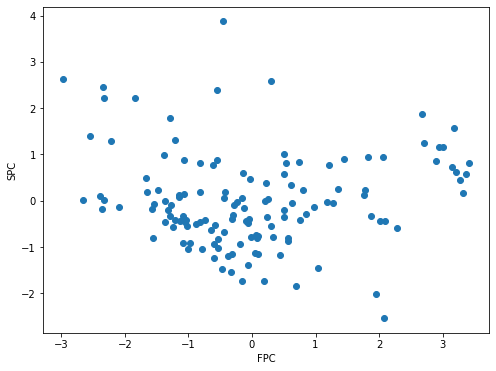

In [3]:
# Creating features and labels
x = shipdata2020[['Speed','COG','Length','Breadth']]
y = pd.DataFrame()
y = y.append(shipdata2020['Ship_type'])
print(x.info())
print(y.info())

# Performing feature z-score standardization by implementing the StandardScaler.
scaler = StandardScaler()
x = scaler.fit(x).transform(x)

# Mapping the features to two dimensions
pca = PCA(n_components = 2)
xPCA = pca.fit(x).transform(x)

# Creating a numpy array for labels
yNum = y.T
yNum = yNum[0:].replace(['Cargo','Tanker','Tug'],[0,1,2])
yNumArr = yNum['Ship_type'].values

# Checking the shape before and after mapping
print('\nShape of x before PCA (n=2): ', x.shape)
print('\nShape of x after PCA (n=2): ', xPCA.shape)

# Visualizing to scatter plot
plt.figure(figsize = (8,6))
plt.scatter(xPCA[:,0], xPCA[:,1])
plt.xlabel('FPC')
plt.ylabel('SPC')

<p>Can you see distinct clusters in the scatter plot? How many clusters are there?</p>
<p>Clusters would seem to be at around (3,1), (0,3), (-2,1) and (0,0). First three are smaller while the last one is the big cluster in the middle. If only three clusters should be seen (as there are only three ship types as labels) then I'd have to venture a guess that the (0,3) and (-2,1) are the same cluster</p>

### Part 2: Perform clustering on the data and evaluate the results using silhouette score
 
 - Perform agglomerative hierarchical clustering (sklearn.cluster.AgglomerativeClustering) on the data, trying different linkage criteria (ward, complete, single, average). Choose n_clusters -hyperparameter based on the number of classes (i.e. different ship types in the data). Use default values for the other hyperparameters.
 - Use the z-score standardized 4-dimensional data for the clustering - not the pca-transformed data!
 - Compute and print silhouette score for each clustering using a different linkage criterion. Which linkage criterion performs the best with respect to the silhouette score?

In [4]:
# Help for implementing the silhouette score evaluation was obtained from
# https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/
silhScores = []

clusterWard = AgglomerativeClustering(n_clusters=3, linkage='ward')
yWard = clusterWard.fit_predict(x)
silhScores.append(silhouette_score(xPCA, clusterWard.labels_))

clusterComplete = AgglomerativeClustering(n_clusters=3, linkage='complete')
yComplete = clusterComplete.fit_predict(x)
silhScores.append(silhouette_score(xPCA, clusterComplete.labels_))

clusterAverage = AgglomerativeClustering(n_clusters=3, linkage='average')
yAverage = clusterAverage.fit_predict(x)
silhScores.append(silhouette_score(xPCA, clusterAverage.labels_))

clusterSingle = AgglomerativeClustering(n_clusters=3, linkage='single')
ySingle = clusterSingle.fit_predict(x)
silhScores.append(silhouette_score(xPCA, clusterSingle.labels_))

print('\nSilhouette scores by linkage:')
print('\nWard: ', silhScores[0])
print('\nComplete: ', silhScores[1])
print('\nAverage: ', silhScores[2])
print('\nSingle: ', silhScores[3])


Silhouette scores by linkage:

Ward:  0.45968858445042154

Complete:  0.36715193376503685

Average:  0.28372516911328854

Single:  0.2854526807244142


<p>Best linkage by silhouette score is the 'Ward' with a score of approx. ~0.46.</p>

###  Part 3: Compare the clusters with the true labels

 - If you performed the preprocessing steps as instructed, the linkage criterion with the highest silhouette score should be 'ward'. If a different linkage criterion performed better, make sure all the preprocessing steps were performed correctly. In any case, use 'ward' linkage criterion from here on.
 
 - Perform agglomerative hierarchical clustering using the chosen linkage criterion and the same number of clusters as before. Visualize the clusters in a scatter plot by performing pca transformation to two dimensions and color the scatter plot based on the predictions produced by the clustering algorithm.
 
 - Visualize the data again, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful?
 
 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (sklearn.metrics.adjusted_rand_score) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a relatively low rand index does not necessarily mean that you have made a mistake.

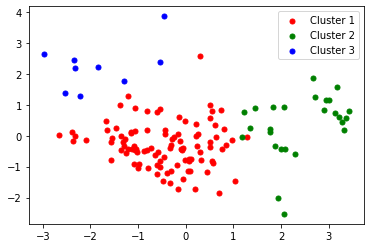

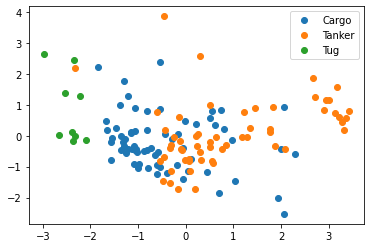

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 2 0 0 0 0 1 0 0 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
[0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 2 0 0 0 0 1 0 0 2 0 0 2 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 2 2 1 0 2 2 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0]

ARI:  0.11644825726642981


In [5]:
# Performing agglomerative hierarchical clustering
wardCluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
predictWard = wardCluster.fit_predict(x)

# Visualizing clusters
plot1 = plt.figure(1)
predClustPlot = plt.scatter(xPCA[predictWard == 0,0], xPCA[predictWard == 0,1],
                            s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(xPCA[predictWard == 1,0], xPCA[predictWard == 1,1], s = 25,
            c = 'green', label = 'Cluster 2')
plt.scatter(xPCA[predictWard == 2,0], xPCA[predictWard == 2,1], s = 25,
            c = 'blue', label = 'Cluster 3')
plt.legend()

# Visualising the data based on true class labels
xPCARealClasses = pd.DataFrame({'FPC': xPCA[:, 0], 'SPC': xPCA[:, 1]})
xPCARealClasses.insert(0, 'Class', shipdata2020['Ship_type'].values, True)
realClassGrouped = xPCARealClasses.groupby('Class')
plot2 = plt.figure(2)
for shipType, group in realClassGrouped:
  plt.plot(group.FPC, group.SPC, marker='o', linestyle='', markersize=6,
           label=shipType)
plt.legend()
plt.show()

# Calculating the rand index
print(predictWard)
print(yNumArr)
randIndex = adjusted_rand_score(predictWard, yNumArr)
print('\nARI: ',randIndex)

<p>Based on visual comparison between the clusters and true classes, was the clustering successful?</p>
<p>So and so. The mix of two real classes seems to fuse into a single big cluster which most likely is the major cause of mispredictions. All in all the clustering method seems to somewhat pick out the real clusters of ship types being formed near the edges of the plot but even in these cases the accuracy does not seem very ideal.</p>
<br/>
<p>What is the interpretation of the adjusted rand index?</p>
<p>The ARI score of  ~0.116 practically would indicate that the trained model is doing only slightly better than randomly guessing the correct labels. Based on this result alone one could say that the trained model in it's present state isn't very useful for predicting.</p>

### Part 4: Plot the dendrogram

 - As a last step, plot a dendrogram of the clustering to visualize the merging process.
 - For this you will need a linkage matrix - while you can extract one from the AgglomerativeClustering model, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using Ward's method, and plot the dendrogram (using scipy.cluster.hierarchy.dendrogram). Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - Consult the course material. How do you interpret the dendrogram?

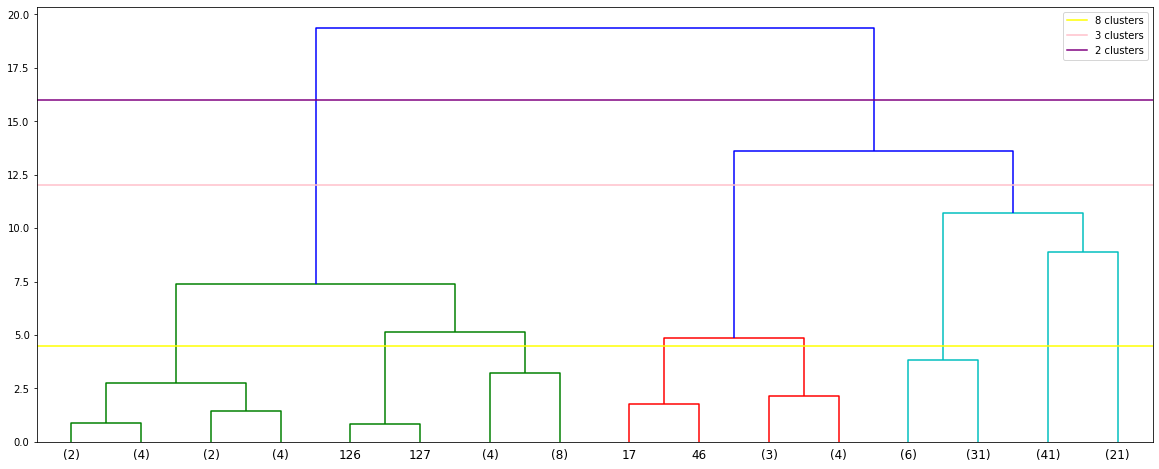

In [6]:
# calculating linkage matrix
linkageMatrix = linkage(x, 'ward')

# drawing the dendrogram
fig = plt.figure(figsize=(20,8))
dendro = dendrogram(linkageMatrix, p=3, truncate_mode='level')
plt.axhline(y=4.5, label='8 clusters', color='yellow')
plt.axhline(y=12, label='3 clusters', color='pink')
plt.axhline(y=16, label='2 clusters', color='purple')
plt.legend()
plt.show()

<p>How to interpret the dendrogram?</p>
<p>The dendrogram is a visual representation of the relationships between the feature objects in the data. The diagram itself can be used as a tool to form clusters / allocate said objects into clusters.</p>
<p>In the diagram x-axis represents clusters and y-axis distance (or closeness) of individual objects or the clusters they form. Interpreting from the very bottom upwards, each object is at first considered as a single cluster. These clusters are then joined together based on their similarity in measured distance. This forming of bigger clusters goes on until at the very end the whole observable sample size can be considered a single cluster.</p>
<p>The distances observed withing the dendrogram between links represents the size of the difference between these features; the faster the objects/clusters merge into one another the closer they are in terms of their features.</p>
<p>The straight line added to the dendrogram above showcases the ability to use this diagram as a tool. Basically, the amount of links broken by any line drawn tells us how many clusters will be formed if the clustering stops at the line's distance. Overall the dendrogram itself also helps us understand our data better as it shows us all the possible links and clusters.</p>

### Part 5: Optional bonus task 

 - In this exercise you have used agglomerative hierarchical clustering to find patterns in the data. K-means clustering is another important method of unsupervised learning with many applications.
 - Write your own simple implementation of naive k-means clustering algorithm and use it to find patterns in the data as in part 3. Plot the result and print the rand score as in part 3.
 - As this is a relatively difficult task, a perfect implementation is not expected nor required for the bonus point.
 - Remember to comment the code extensively! (Bonus point will not be awarded for uncommented solution)

No handles with labels found to put in legend.


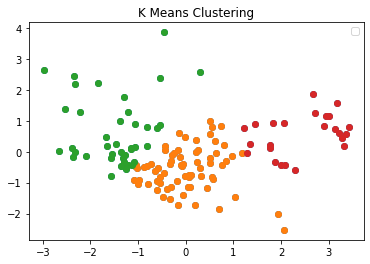

In [7]:
# Below is heavily influenced by the following sources:
# https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python
# https://www.unioviedo.es/compnum/labs/new/kmeans.html
#
# I did not manage to calculate the ARI score as I was not able to produce a
# predict array from the manually implemented k means below to compare 
# to the true label array. All things considering, this bonus task was attempted
# to try out the process, none the less.


# Using the already defined xPCA and yNumArr for x and y arrays.
# Setting k = 3 as there are three real classes and storing
# xPCA shape for later use.
k = 3
m = xPCA.shape[0]
n = xPCA.shape[1]

# Creating an empty array to store centroids.
# Must match xPCA shape.
centroids = np.array([]).reshape(n,0)

# Creating 3 random centroids for a start
for i in range(k):
  centroids = np.c_[centroids, xPCA[random.randint(0,m-1)]]

# Creating a new empty array for storing distances.
# Must match xPCA shape.
# Using euclidean distance.
dist = np.array([]).reshape(m,0)

# Finding distances between centroids and saving them to array.
for i in range(k):
  dist = np.c_[dist, np.sum((xPCA-centroids[:,i])**2, axis=1)]

# Taking the min values found and storing them.
minDist = np.argmin(dist, axis=1)+1

# Calculating the mean of separate clusters
center = {}
for i in range(k):
  center[i+1] = np.array([]).reshape(2,0)

# Assigning clusters to center points
for i in range(m):
    center[minDist[i]]=np.c_[center[minDist[i]], xPCA[i]]
for i in range(k):
    center[i+1] = center[i+1].T

# Updating the mean value
for i in range(k):
     centroids[:,i] = np.mean(center[i+1], axis=0)

# Repeating the above n times
for i in range(100):
      dist = np.array([]).reshape(m,0)
      for i in range(k):
          dist = np.c_[dist, np.sum((xPCA-centroids[:,i])**2, axis=1)]
      C = np.argmin(dist, axis=1)+1
      center = {}
      for i in range(k):
           center[i+1] = np.array([]).reshape(2,0)
      for i in range(m):
           center[C[i]] = np.c_[center[C[i]], xPCA[i]]
      for i in range(k):
           center[i+1] = center[i+1].T
      for i in range(k):
           centroids[:,i] = np.mean(center[i+1], axis=0)
      final = center

# Plotting
plot3 = plt.figure(3)

plt.scatter(xPCA[:,0], xPCA[:,1])
plt.title('xPCA original')
for i in range(k):
    plt.scatter(final[i+1][:,0], final[i+1][:,1])
plt.title('K Means Clustering')
plt.legend()
plt.show()

In [8]:
colab_pdf('DAKD2020_ex4_tomi_salomaa.ipynb')

Mounted at /content/drive/
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'